In [1]:
try:
    from sklearn.neighbors import NearestNeighbors
except ImportError:
    !pip3 install scikit-learn
    from sklearn.neighbors import NearestNeighbors

In [2]:
import pandas as pd
import glob
import os
import tarfile
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.cm as cm

from sklearn.neighbors import NearestNeighbors

from matplotlib import cm

In [3]:
%%bash
if [ ! -f "ukb40_random_embeddings.tar" ]; then
    dx download -f "/commons/champollion_embeddings/ukb40_random_embeddings.tar"
fi

In [4]:
if not os.path.exists("ukb40_random_embeddings"):
    f = tarfile.open("ukb40_random_embeddings.tar")
    f.extractall(".")

In [5]:
%%bash
dx download -f "/commons/csv/with_T1_early_life_right_handed_participant.csv"

In [6]:
participants = pd.read_csv("with_T1_early_life_right_handed_participant.csv")

In [7]:
ukb_emb_file = "ukb40_random_embeddings/OCCIPITAL_left_name07-34-40--229_embeddings.csv"
print(ukb_emb_file)

ukb40_random_embeddings/OCCIPITAL_left_name07-34-40--229_embeddings.csv


In [8]:
"""
participants = participants[['Participant ID', 'Handedness (chirality/laterality) | Instance 0']]
participants = participants.rename(columns={'Participant ID': "ID", "Handedness (chirality/laterality) | Instance 0": "Handedness"})
participants = participants.set_index("ID")
print(participants.head())

participants = participants[(participants.Handedness == "Right-handed") | (participants.Handedness == "Left-handed")]
participants["isRightHanded"] = (participants.Handedness == "Right-handed").astype(int)
print(participants.describe())
"""

"""
label = "Birthweight"

participants = participants[['Participant ID', 'Birth weight | Instance 0', 'Birth weight known | Instance 0']]
participants = participants.rename(columns={'Participant ID': "ID", "Birth weight | Instance 0": label})
participants = participants.set_index("ID")
print(participants.head())

participants = participants[participants['Birth weight known | Instance 0'] == "Yes - pounds and ounces"]
participants = participants[[label]].dropna()
q_01 = participants[label].quantile(0.01)
q_99 = participants[label].quantile(0.99)
participants = participants[(participants[label] > q_01) & (participants[label] < q_99)]
participants.describe()
"""


label = "MaternalSmoking"
participants = participants[['Participant ID', 'Maternal smoking around birth | Instance 0']]
participants = participants.rename(columns={'Participant ID': "ID", "Maternal smoking around birth | Instance 0": label})
participants = participants.set_index("ID")
print(participants.head())
participants = participants[(participants[label] == "Yes") | (participants[label] == "No")]
participants[label] = (participants[label] == "Yes").astype(int)
participants.describe()


"""
label = "BreastFeeding"
participants = participants[['Participant ID', 'Breastfed as a baby | Instance 0']]
participants = participants.rename(columns={'Participant ID': "ID", "Breastfed as a baby | Instance 0": label})
participants = participants.set_index("ID")
participants.head()
participants = participants[(participants[label] == "Yes") | (participants[label] == "No")]
participants[label] = (participants[label] == "Yes").astype(int)
participants.describe()
"""

"""
label = "MultipleBirth"
participants = participants[['Participant ID', 'Part of a multiple birth | Instance 0']]
participants = participants.rename(columns={'Participant ID': "ID", "Part of a multiple birth | Instance 0": label})
participants = participants.set_index("ID")
print(participants.head())
participants = participants[(participants[label] == "Yes") | (participants[label] == "No")]
participants[label] = (participants[label] == "Yes").astype(int)
participants.describe()
"""

"""
label = "Migraine"
participants = participants.merge(participants2, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Sex", 'Ever had migraine']]
participants = participants.rename(columns={'Participant ID': "ID", "Ever had migraine": label})
participants = participants.set_index("ID")
print(participants.head())
participants = participants[(participants[label] == "Yes") | (participants[label] == "No")]
participants = participants[participants["Sex"] == "Male"]
participants = participants[[label]].dropna()
participants[label] = (participants[label]=="Yes").astype(int)
participants.describe()
"""

"""
label = "FluidIntelligence"
participants = participants.merge(participants2, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', 'Fluid intelligence score | Instance 0']]
participants = participants.rename(columns={'Participant ID': "ID", "Fluid intelligence score | Instance 0": label})
participants = participants.set_index("ID")
print(participants.head())
participants = participants[[label]].dropna()
participants.describe()
"""


"""
label = "Epilepsy"
participants = participants.merge(participants2, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', 'Date G40 first reported (epilepsy)']]
participants = participants.rename(columns={'Participant ID': "ID", "Date G40 first reported (epilepsy)": label})
participants = participants.set_index("ID")
print(participants.head())
participants[label] = participants[label].isna().astype(int)
participants.describe()
"""

"""
label = "PRS_BipolarDisorder"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', 'Enhanced PRS for bipolar disorder (BD)']]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for bipolar disorder (BD)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Schizophrenia"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', 'Enhanced PRS for schizophrenia (SCZ)']]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for schizophrenia (SCZ)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Alzheimer"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for alzheimer's disease (AD)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for alzheimer's disease (AD)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Ischaemic_Stroke"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for ischaemic stroke (ISS)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for ischaemic stroke (ISS)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Multiple_Sclerosis"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for multiple sclerosis (MS)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for multiple sclerosis (MS)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Parkinson_Disease"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for parkinson's disease (PD)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for parkinson's disease (PD)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Sphingomyelins"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for sphingomyelins (SGM)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for sphingomyelins (SGM)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_Age_related_macular_degenration"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for age-related macular degeneration (AMD)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for age-related macular degeneration (AMD)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""

"""
label = "PRS_glaucoma"
participants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")
participants = participants[['Participant ID', "Enhanced PRS for primary open angle glaucoma (POAG)"]]
participants = participants.rename(columns={'Participant ID': "ID", "Enhanced PRS for primary open angle glaucoma (POAG)": label})
participants = participants.set_index("ID")
participants = participants.dropna()
print(participants.head())
participants.describe()
"""






        MaternalSmoking
ID                     
1000606              No
1000715              No
1000963             Yes
1001107             Yes
1002539             Yes


'\nlabel = "PRS_glaucoma"\nparticipants = participants.merge(prs, left_on="Participant ID", right_on="Participant ID")\nparticipants = participants[[\'Participant ID\', "Enhanced PRS for primary open angle glaucoma (POAG)"]]\nparticipants = participants.rename(columns={\'Participant ID\': "ID", "Enhanced PRS for primary open angle glaucoma (POAG)": label})\nparticipants = participants.set_index("ID")\nparticipants = participants.dropna()\nprint(participants.head())\nparticipants.describe()\n'

In [9]:
participants = participants.set_index("sub-" + participants.index.astype(str))
participants.index

Index(['sub-1000606', 'sub-1000715', 'sub-1000963', 'sub-1001107',
       'sub-1002539', 'sub-1002622', 'sub-1002767', 'sub-1002817',
       'sub-1003262', 'sub-1004791',
       ...
       'sub-6020490', 'sub-6020657', 'sub-6021059', 'sub-6021833',
       'sub-6021898', 'sub-6022362', 'sub-6022626', 'sub-6023376',
       'sub-6023587', 'sub-6024379'],
      dtype='object', name='ID', length=43412)

In [10]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-22.355707,21.426302,-20.148613,35.178516,14.286421,31.030062,70.408330,-43.748238,52.798172,37.044460,...,51.888252,-36.077095,-9.136228,20.746601,10.558082,23.919292,11.415810,-4.829315,8.718986,9.420109
sub-1000325,-21.436749,-72.987640,7.031040,12.101148,8.998109,-6.323623,-11.173864,-18.259092,28.857790,-12.735063,...,39.131287,11.591161,-5.750272,0.999828,-47.701645,10.149230,54.875263,2.757382,-70.214980,-22.399515
sub-1000458,-13.841705,-13.019061,-3.874438,2.346485,-4.886332,11.442360,10.031055,-14.813874,43.342230,29.907055,...,66.383770,19.140629,-42.217790,12.133020,-3.726173,21.290170,31.404270,-25.280909,-45.985123,16.432314
sub-1000575,-16.647459,-43.150684,-27.530655,20.845010,18.708296,16.690950,71.734856,-47.322567,32.259373,18.740140,...,68.364456,-36.050278,13.713411,1.630397,-0.241755,35.099476,29.926890,18.963316,8.863296,49.184130
sub-1000606,10.489159,-32.836660,2.840790,-20.009123,-26.886002,-4.399871,60.946720,-46.024180,34.516730,43.899334,...,72.260254,-46.407864,16.101280,-7.125009,-8.509824,2.367961,-10.249297,7.301632,11.381813,37.322575


In [11]:
merged = participants[[label]].merge(ukb_emb, left_index=True, right_index=True)
# UKB latent space analysis

In [12]:
embeddings = merged.iloc[:,1:]
label_df = merged.iloc[:,0:1]
label_random = label_df.copy()
label_random[:] = label_random.sample(frac=1).values
# print(embeddings.head())
print(label_df.head())
print(label_random.head())

             MaternalSmoking
ID                          
sub-1000606                0
sub-1000715                0
sub-1000963                1
sub-1001107                1
sub-1002539                1
             MaternalSmoking
ID                          
sub-1000606                0
sub-1000715                1
sub-1000963                1
sub-1001107                0
sub-1002539                0


In [13]:
# Construct nearest_neighbor matrix
nbrs = NearestNeighbors(n_neighbors=int(len(embeddings)/2), algorithm='brute').fit(embeddings)
distances, indices = nbrs.kneighbors(embeddings)
indices.shape

(37388, 18694)

In [14]:
def construct_average_nearest_neighbors(label_df):
    # Takes list of incides whose label is 1
    label_red = label_df.reset_index()[[label]]
    label_1 = label_red[label_red[label]==1].index.to_list()
    
    # In the indices matrix, put value of label corresponding to index
    neighbors = indices[:,1:]
    labels1 = np.in1d(neighbors, label_1)
    labels1 = labels1.reshape(neighbors.shape).astype(int)
    
    # Makes moving average along nearest neighbor
    labels1_cum = np.cumsum(labels1, axis=1)
    means_npy = np.zeros(labels1_cum.shape)
    for idx in range(len(labels1)):
        means_npy[idx,:] = labels1_cum[idx,:]/(np.arange(1, labels1_cum.shape[1]+1, 1).reshape(1,-1))
        
    return labels1, means_npy

In [15]:
def construct_average_distance_nearest_neighbors():

    # Makes moving average along nearest neighbor
    distances_cum = np.cumsum(distances[:,1:], axis=1)
    means_distance = np.zeros(distances_cum.shape)
    for idx in range(len(distances)):
        means_distance[idx,:] = distances_cum[idx,:]/(np.arange(1, distances_cum.shape[1]+1, 1).reshape(1,-1))
        
    return means_distance

In [16]:
label

'MaternalSmoking'

In [17]:
label_red = label_df.reset_index()[[label]]
label_1 = label_red[label_red[label]==1].index.to_list()

# In the indices matrix, put value of label corresponding to index
neighbors = indices[:,1:]
labels1 = np.in1d(neighbors, label_1)
labels1 = labels1.reshape(neighbors.shape).astype(int)

In [18]:
# Makes moving average along nearest neighbor
labels1_cum = np.cumsum(labels1, axis=1)
means_npy = np.zeros(labels1_cum.shape)

In [19]:
for idx in range(len(labels1)):
    means_npy[idx,:] = labels1_cum[idx,:]/(np.arange(1, labels1_cum.shape[1]+1, 1).reshape(1,-1))

In [20]:
values_npy = labels1

In [21]:
# values_npy, means_npy = construct_average_nearest_neighbors(label)

In [22]:
means_distance = construct_average_distance_nearest_neighbors()

In [23]:
val_random_npy, random_npy = construct_average_nearest_neighbors(label_random)

In [24]:
def create_mean_interval(values_npy):
    i=0
    limits = [0]
    while (i<values_npy.shape[1]):
        j = min(2*i+1, values_npy.shape[1])
        limits.append(j)
        i = j
    limits = limits[:-1]
    print(limits)
    means_interval = np.zeros((values_npy.shape[0], (len(limits)-1)))
    for i in range(len(limits)-1):
        means_interval[:,i] = np.mean(values_npy[:, limits[i]:limits[i+1]], axis=1)
    return means_interval, limits

In [25]:
means_interval, limits = create_mean_interval(values_npy)

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383]


In [26]:
means_distance_interval, _ = create_mean_interval(distances[:,1:])

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383]


In [27]:
means_distance_interval.shape

(37388, 14)

In [28]:
means_random_interval, _ = create_mean_interval(val_random_npy)

[0, 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383]


In [29]:
print(len(limits), means_interval.shape[1])

15 14


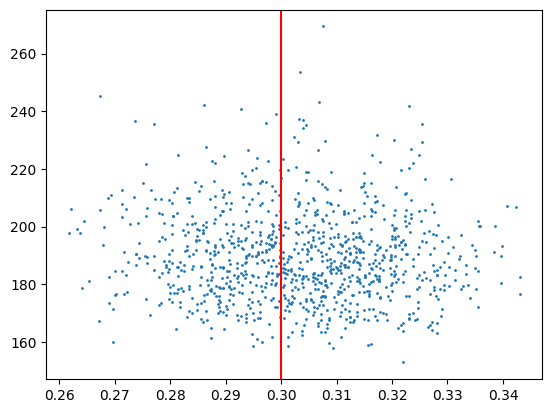

In [30]:
nb_interval=12
number=1000
plt.scatter(means_interval[:number, nb_interval], means_distance_interval[:number, nb_interval], s=1)
plt.axvline(x=np.mean(label_df.values), color='r', linestyle='-')
# plt.axhline(y=0, color='black', linestyle='-')
# plt.axhline(y=1, color='black', linestyle='-')

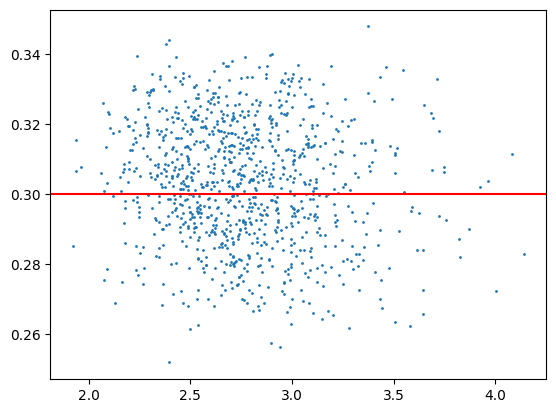

In [31]:
nb_interval=10000
number=1000
plt.scatter(means_distance[:number, nb_interval]/means_distance[:number, 1], means_npy[:number, nb_interval], s=1)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')

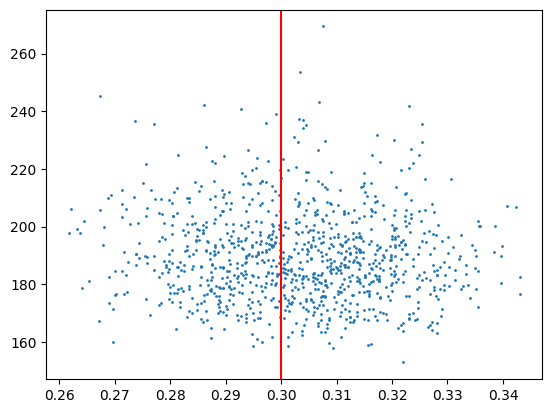

In [33]:
nb_interval=12
number=1000
plt.scatter(means_interval[:number, nb_interval], means_distance_interval[:number, nb_interval], s=1)
plt.axvline(x=np.mean(label_df.values), color='r', linestyle='-')
# plt.axhline(y=0, color='black', linestyle='-')
# plt.axhline(y=1, color='black', linestyle='-')

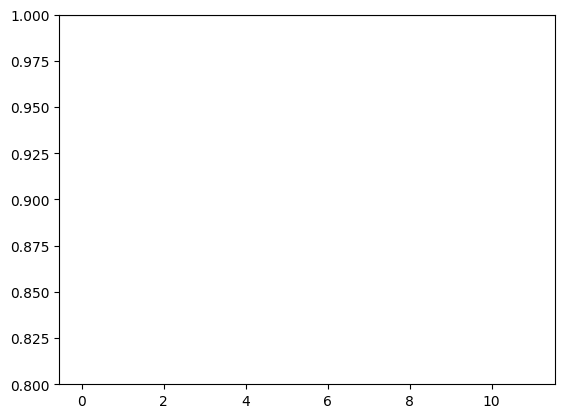

In [34]:
number=10
for idx in range(number):
    idx2 = (idx+1000)
    plt.plot(means_interval[idx2, 2:], c = cm.rainbow(1.*idx/number))
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')
plt.ylim(0.8,1)
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')

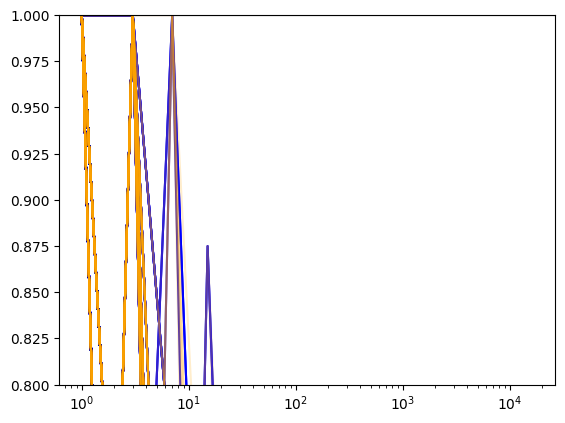

In [35]:
for idx in range(1,35000,50):
    plt.plot(limits[1:], means_interval[idx, :], color='b')
for idx in range(1,35000,50):
    plt.plot(limits[1:], means_random_interval[idx, :], color='orange', alpha=0.2)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')
plt.ylim(0.8,1)
plt.xscale('log')

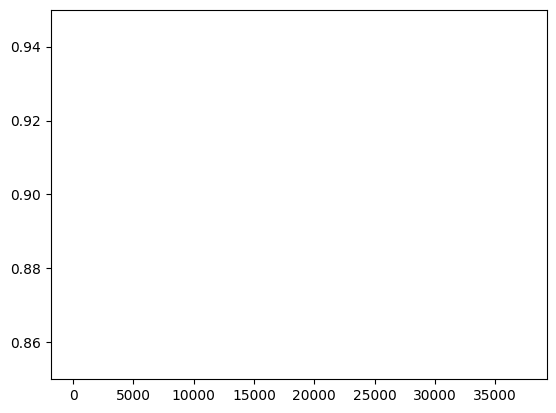

In [36]:
nb_interval=12
plt.plot(means_interval[:, nb_interval])
plt.plot(means_random_interval[:, nb_interval], alpha=0.7)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')
plt.ylim(0.85,0.95)
plt.show()

In [37]:
means_interval.shape

(37388, 14)

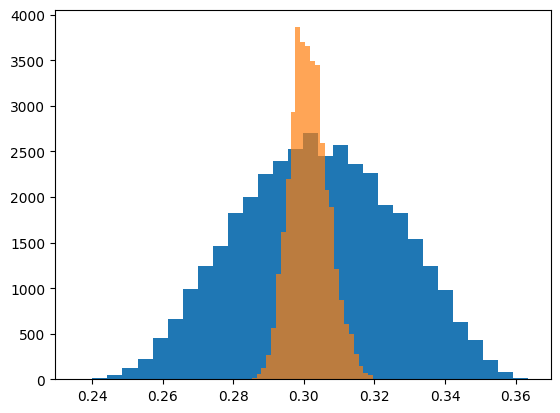

In [38]:
nb_neighbors=6000
plt.hist(means_npy[:, nb_neighbors], bins=30)
plt.hist(random_npy[:, nb_neighbors], bins=30, alpha=0.7)
plt.show()

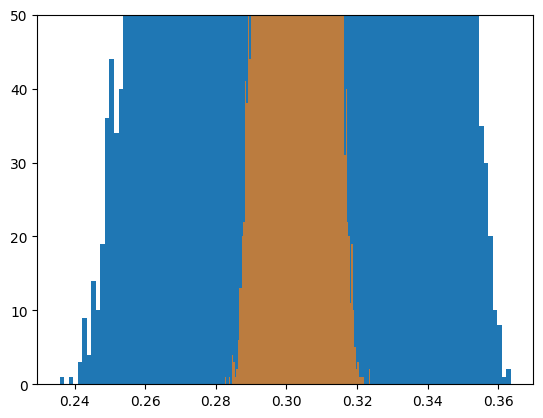

In [39]:
nb_neighbors=6000
plt.hist(means_npy[:, nb_neighbors], bins=100)
plt.hist(random_npy[:, nb_neighbors], bins=100, alpha=0.7)
plt.ylim(0,50)
plt.show()

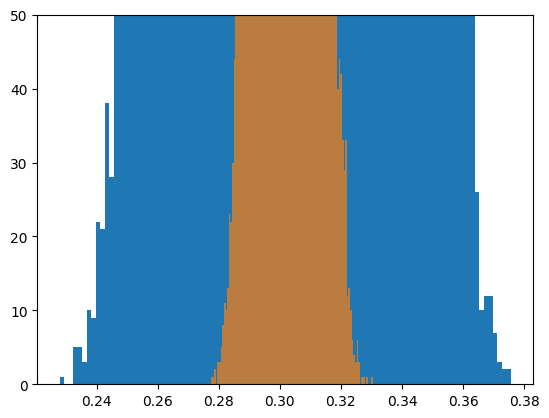

In [40]:
nb_neighbors=4000
plt.hist(means_npy[:, nb_neighbors], bins=100)
plt.hist(random_npy[:, nb_neighbors], bins=100, alpha=0.7)
plt.ylim(0,50)
plt.show()

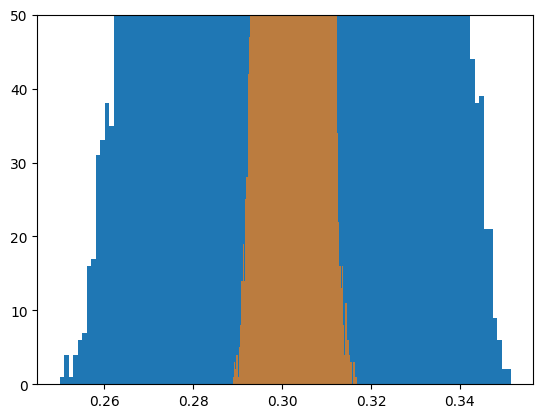

In [41]:
nb_neighbors=10000
plt.hist(means_npy[:, nb_neighbors], bins=100)
plt.hist(random_npy[:, nb_neighbors], bins=100, alpha=0.7)
plt.ylim(0,50)
plt.show()

In [43]:
print(np.argmin(means_npy[:, nb_neighbors]))
label_df.iloc[np.argmin(means_npy[:, nb_neighbors]),:]

15143


MaternalSmoking    0
Name: sub-1117496, dtype: int64

In [45]:
np.argmax(means_npy[:, nb_neighbors])
label_df.iloc[np.argmax(means_npy[:, nb_neighbors]),:]

MaternalSmoking    0
Name: sub-3353137, dtype: int64

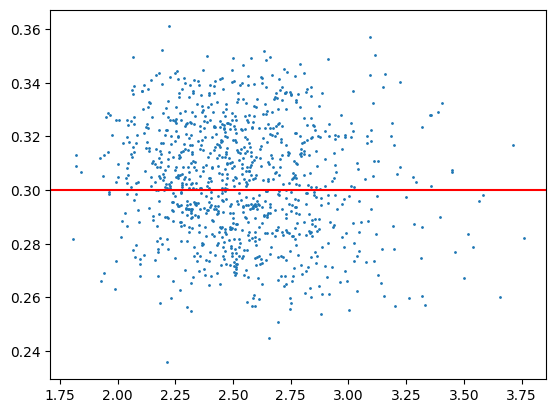

In [47]:
nb_neighbors=6000
number=1000
plt.scatter(means_distance[:number, nb_neighbors]/means_distance[:number, 1], means_npy[:number, nb_neighbors], s=1)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')

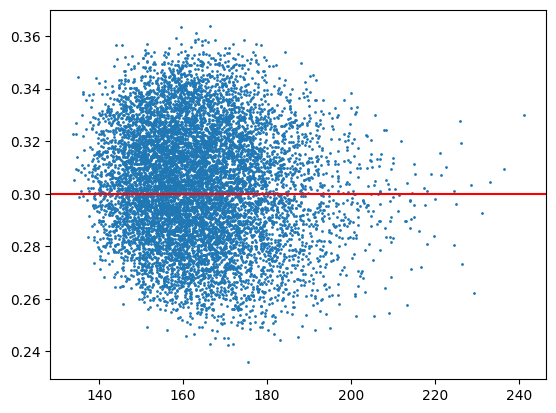

In [49]:
nb_neighbors=6000
number=10000
plt.scatter(means_distance[:number, nb_neighbors], means_npy[:number, nb_neighbors], s=1)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')

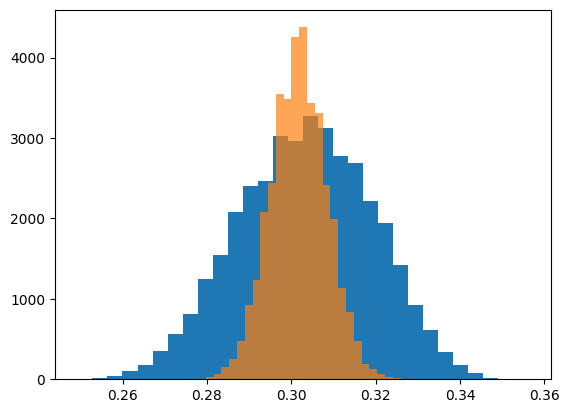

In [50]:
nb_interval=12
plt.hist(means_interval[:, nb_interval], bins=30)
plt.hist(means_random_interval[:, nb_interval], bins=30, alpha=0.7)
plt.show()

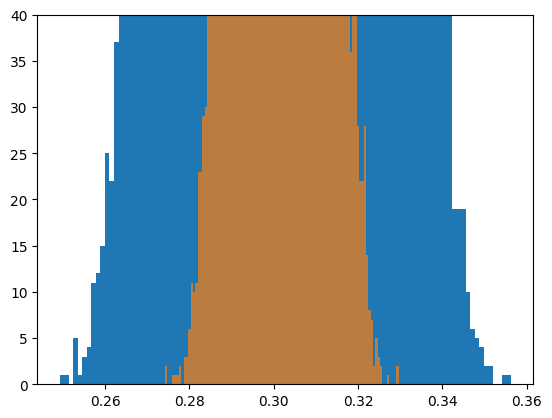

In [51]:
nb_interval=12
plt.hist(means_interval[:, nb_interval], bins=100)
plt.hist(means_random_interval[:, nb_interval], bins=100, alpha=0.7)
plt.ylim(0,40)
plt.show()

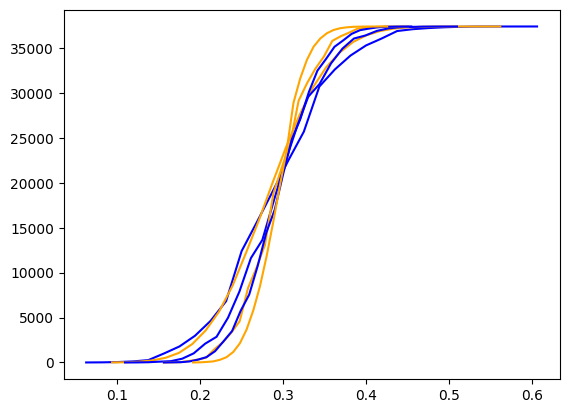

In [52]:
for nb_interval in range(6,9,1):
    values, base = np.histogram(means_interval[:, nb_interval], bins=30)
    plt.plot(base[:-1], np.cumsum(values), c='blue')
    values, base = np.histogram(means_random_interval[:, nb_interval], bins=30)
    plt.plot(base[:-1], np.cumsum(values), c='orange')
plt.show()

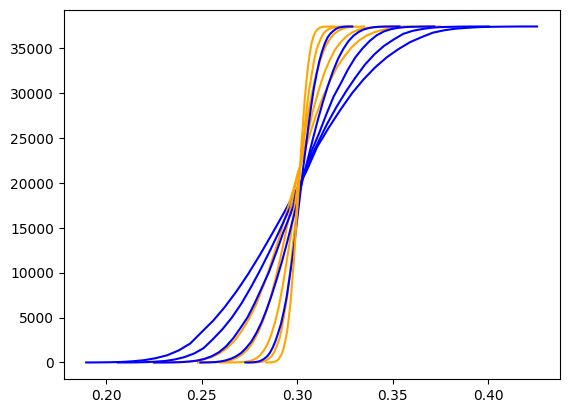

In [53]:
for nb_interval in range(9,14,1):
    values, base = np.histogram(means_interval[:, nb_interval], bins=40)
    plt.plot(base[:-1], np.cumsum(values), c='blue')
    values, base = np.histogram(means_random_interval[:, nb_interval], bins=40)
    plt.plot(base[:-1], np.cumsum(values), c='orange')
plt.show()

In [ ]:
for idx in range(2,35000,5):
    plt.plot(means_npy[idx, 20:], color='b')
for idx in range(2,35000,5):
    plt.plot(random_npy[idx, 20:], color='orange', alpha=0.2)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
for idx in range(1,35000,2):
    plt.plot(means_npy[idx, 20:], color='b')
for idx in range(1,35000,2):
    plt.plot(random_npy[idx, 20:], color='orange', alpha=0.2)
plt.axhline(y=np.mean(label_df.values), color='r', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
for idx in range(1,35000,5):
    plt.plot(random_npy[idx, 20:], color='b')
for idx in range(2,35000,5):
    plt.plot(random_npy[idx, 20:], color='orange', alpha=0.2)
plt.axhline(y=np.mean(label.values), color='r', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')
plt.ylim(0.8, 1)
plt.show()

In [ ]:
plt.plot(means_npy[:, 15000])
plt.plot(random_npy[:, 15000])
plt.axhline(y=np.mean(label.values), color='r', linestyle='-')
plt.axhline(y=0, color='black', linestyle='-')
plt.axhline(y=1, color='black', linestyle='-')
plt.ylim(0.875,0.925)
plt.show()